# Notebook 3: Comparing cell type variance and temporal structure

---

><font size="3"> This is the third of three methods notebooks associated with the [pub](https://research.arcadiascience.com/pub/result-comparative-crawling) "*Comparative analyses reveal substantial movement variation among amoeboid cells*".
>    
><font size="3"> Here, we will build on the work in the first two notebooks to analyze structural and temporal variation within and among cell types. This will culminate in an analysis of the relationship between morphology and movement and the development of simple statistics for comparing this feature across cell types.

---

## Comparing overall cell type movement variance

><font size="3"> In this chunk, we will use several measures to analyze the variability of cellular movement within and between cell types.
>    
><font size="3"> First, we will calculate the **cosine similarity** among each cell type. To do so, we will generate probability density functions for each cell's trajectory through movement space, creating a 2d profile of each cell's movement during the trial time. **Cosine similarity** -a measure of the similarity of two sequences of numbers - will then be used to calculate the relationships between the movement profiles for each cell type.
>    
><font size="3"> We will then use **entropy** to infer whether or not these differences in movement profiles are associated with stereotypical or random types of movement. Here, as with **cosine similarity**, we are going to calculate the **entropy** of the number sequences represented by the movement profiles (i.e. probability density functions). Lower values of **entropy** correspond to more stereotyped movements (specifically, movement profiles that are largely constrained to specific regions of movement space). On the other hand, higher values of **entropy** correspond to less stereotype, more variable movement, the probabilities of which are likely more evenly distributed throughout movement space.
>   
><font size="3"> Finally, we will visualize the relationships of all movement profiles across cell types using **principal component analysis**.

---

<font size="3"> Set working directory.

In [1]:
setwd('../')

<font size="3"> Source functions.

In [2]:
suppressPackageStartupMessages(source('01_utils/plotting_functions.R'))
suppressPackageStartupMessages(source('01_utils/treble_functions.R'))
suppressPackageStartupMessages(source('01_utils/utility_functions.R'))

<font size="3"> Load data.

In [3]:
layout = readRDS('02_analysis_files/behavior_space_layout_annotated.RDS')
dat = readRDS('00_data/cell_matrices.RDS')
s = readRDS('02_analysis_files/shape_pca_15_pcs.RDS')

<font size="3"> Split layout on species.

In [4]:
#Split layout on cell type
s = split(layout, layout$cell)

#Add all to list
s[['all']] = layout

<font size="3"> Calculate **cosine similarity** (as in <b> Figure 3A </b> of Results Pub).

In [5]:
#Create empty list to save results
cos_d = list()

#Calculate
for(h in 1:length(s)){

  #Split on trial
  z = split(s[[h]], s[[h]]$trial)

  #Limits for pdfs
  xmin = min(layout$x)
  xmax = max(layout$x)
  ymin = min(layout$y)
  ymax = max(layout$y)

  #Generate pdfs for each trial
  res = list()
  for(i in 1:length(z)){
    res[[i]] = unlist(as.data.frame(kde2d(z[[i]]$x, z[[i]]$y, h = 1, n = 100, lims = c(c(xmin, xmax), c(ymin, ymax)))$z))
  }
  res = do.call(cbind, res)

  #Calculate cosine similarity
  d = cosine(res)
  d = unlist(as.data.frame(d))

  cos_d[[names(s)[h]]] = d
}

<font size="3"> Calculate statistical significance of variation in **cosine similarity**.

In [6]:
#Kruskal-Wallis test
k = kruskal.test(cos_d)

#Dunn's test
dunn.test(cos_d)

  Kruskal-Wallis rank sum test

data: cos_d and group
Kruskal-Wallis chi-squared = 768.6292, df = 3, p-value = 0


                         Comparison of cos_d by group                          
                                (No adjustment)                                
Col Mean-|
Row Mean |          1          2          3
---------+---------------------------------
       2 |  -0.952726
         |     0.1704
         |
       3 |   7.964997   8.968269
         |    0.0000*    0.0000*
         |
       4 |   18.76479   22.66425   3.091161
         |    0.0000*    0.0000*    0.0010*

alpha = 0.05
Reject Ho if p <= alpha/2


<font size="3"> Violin plot of **cosine similarity** distributions.

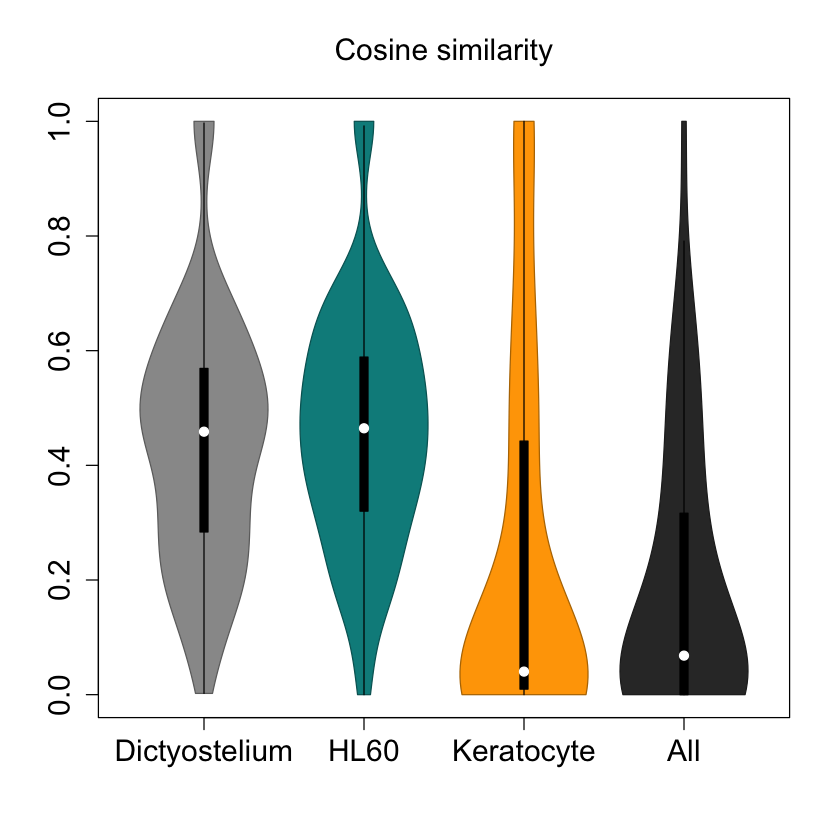

In [7]:
#Set up colors
cols = c('grey60', 'cyan4', 'orange', 'grey20')

#Plot
vioplot(cos_d$dicty, 
        cos_d$hl60, 
        cos_d$kera, 
        cos_d$all,
        names = c('Dictyostelium', 'HL60', 'Keratocyte', 'All'),
        col = cols, 
        border = darken_color(cols),
        cex.lab = 1.5, 
        cex.axis = 1.5, 
        cex.names = 1.5)
title(main = 'Cosine similarity', font.main = 1, cex.main = 1.5)

<font size="3"> Calculate **entropy** (as in <b> Figure 3B </b> of Results Pub).

In [8]:
#Create empty list to save results
ent_d = list()

#Calculate
for(h in 1:length(s)){
  
  #Split on trial
  z = split(s[[h]], s[[h]]$trial)

  #Limits for pdfs
  xmin = min(layout$x)
  xmax = max(layout$x)
  ymin = min(layout$y)
  ymax = max(layout$y)

  #Generate pdfs for each trial
  res = list()
  for(i in 1:length(z)){
    res[[i]] = unlist(as.data.frame(kde2d(z[[i]]$x, z[[i]]$y, h = 1, n = 100, lims = c(c(xmin, xmax), c(ymin, ymax)))$z))
  }
  res = do.call(cbind, res)

  d = apply(res, 2, function(x) entropy(x, unit = 'log2'))
  d = unlist(as.data.frame(d))

  ent_d[[names(s)[h]]] = d
}


<font size="3"> Calculate statistical significance of variation in **entropy**.

In [9]:
#Kruskal-Wallis test
k = kruskal.test(ent_d)

#Dunn's test
dunn.test(ent_d)

  Kruskal-Wallis rank sum test

data: ent_d and group
Kruskal-Wallis chi-squared = 22.908, df = 3, p-value = 0


                         Comparison of ent_d by group                          
                                (No adjustment)                                
Col Mean-|
Row Mean |          1          2          3
---------+---------------------------------
       2 |   1.614246
         |     0.0532
         |
       3 |   4.746336   3.468037
         |    0.0000*    0.0003*
         |
       4 |   2.266741   0.396468  -3.578548
         |    0.0117*     0.3459    0.0002*

alpha = 0.05
Reject Ho if p <= alpha/2


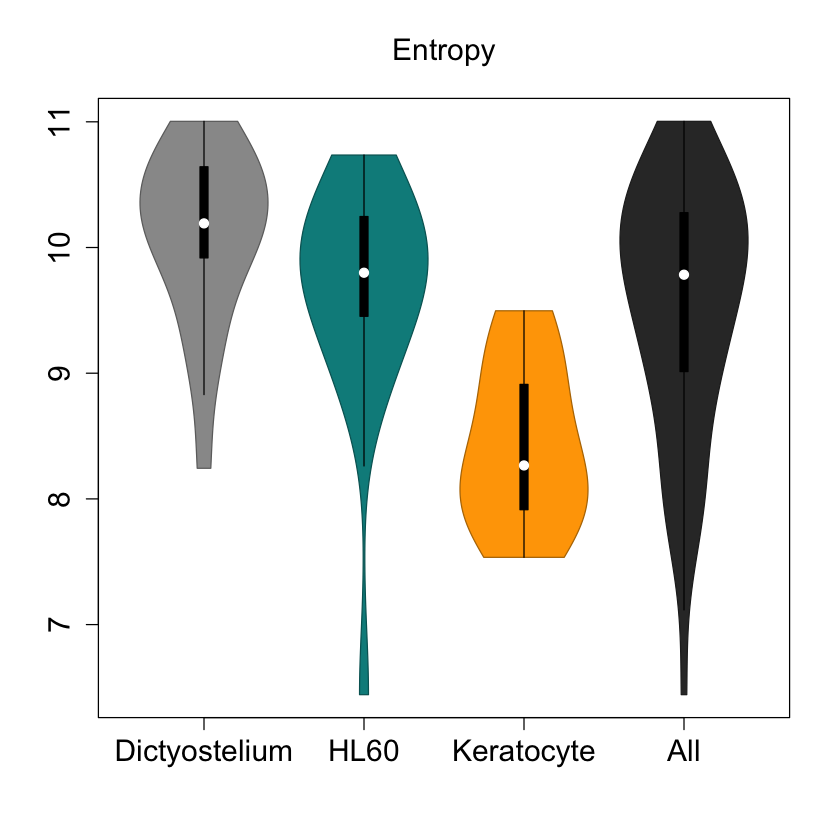

In [10]:
#Set up colors
cols = c('grey60', 'cyan4', 'orange', 'grey20')

#Plot
vioplot(ent_d$dicty, 
        ent_d$hl60, 
        ent_d$kera, 
        ent_d$all,
        names = c('Dictyostelium', 'HL60', 'Keratocyte', 'All'),
        col = cols, 
        border = darken_color(cols),
        cex.lab = 1.5, 
        cex.axis = 1.5, 
        cex.names = 1.5)
title(main = 'Entropy', font.main = 1, cex.main = 1.5)

<font size="3"> Calculate a probability density function (pdf) for each trial.

In [11]:
pdfs = list()
z = split(layout, layout$trial)
for(i in 1:length(z)){

  xmin = min(layout$x)
  xmax = max(layout$x)
  ymin = min(layout$y)
  ymax = max(layout$y)

  pdfs[[names(z)[i]]] = unlist(as.data.frame(kde2d(z[[i]]$x, z[[i]]$y,
                                                   h = 1, n = 100,
                                                   lims = c(c(xmin, xmax), c(ymin, ymax)))$z))
}

pdfs = do.call(cbind, pdfs)

<font size="3"> Run PCA on individual trial pdfs.

In [12]:
pca = prcomp(t(pdfs))

<font size="3"> Plot the first two PCs (as in <b> Figure 3C </b> of Results Pub).

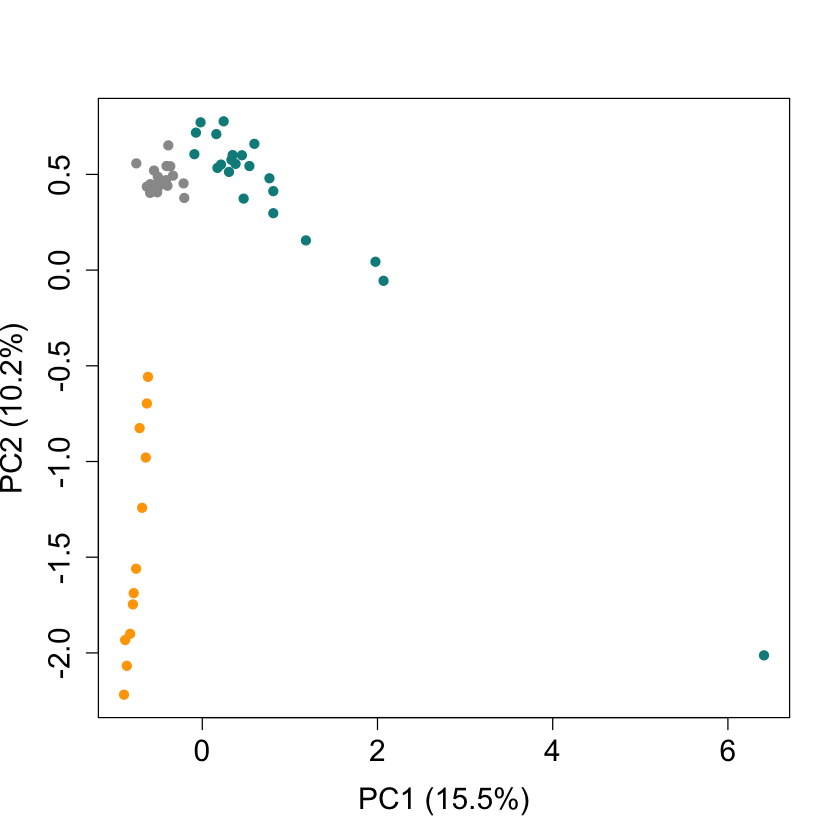

In [13]:
#Set up colors
cols = rep(NA, ncol(pdfs))
cols[grep('dicty', rownames(pca$x))] = 'grey60'
cols[grep('hl60', rownames(pca$x))] = 'cyan4'
cols[grep('kera', rownames(pca$x))] = 'orange'

#Plot
plot(pca$x[,1:2],
     pch = 20,
     cex = 1.5,
     cex.lab = 1.5,
     cex.axis = 1.5,
     col = cols,
     xlab = 'PC1 (15.5%)',
     ylab = 'PC2 (10.2%)')

# Comparing temporal variation

><font size="3"> In the above analyses we compared the overall movement patterns of each cell via probability density function-based movement 'profiles'. In this chunk, we will complement these global comparisons with analyses of the temporal properties of each cell's trajectory through movement space.
>    
><font size="3"> We will focus on two measures: **autocorrelation** and **persistence**.
>    
><font size="3"> First, we will calculate the **autocorrelation** of each cell's trajectory through movement space (inferred by its position over time). Explicitly, **autocorrelation** measures the correlation of a sequence of numbers to itself over time. The resulting distribution of **autocorrelation** can be used to infer how often values in a sequence change and/or are repeated. In the context of movement, distributions that display longer trends of **autocorrelation** may reflect more stereotyped/less frequently changing movements, while less correlated distributions may reflect more varied movement profiles.
>    
><font size="3"> Second, we will calculate **persistence**. Here, **persistence** is a reflection of how long cells tend to stay in regions of movement space. Longer patterns of **persistence** reflect more stereotyped or less varied movement, complementing the inferences made by calculating **autocorrelation** but explicitly measured across the whole movement space.

---

<font size="3"> Calculate **autocorrelation** of behavior space position by cell type.

In [14]:
#Split layout on cell type
s = split(layout, layout$cell)

#Add full dataset to list
s[['all']] = layout

#Use lapply to calculate the autocorrelation distribution over 100 frames per cell type
res = lapply(s, function(x) acf(x$coords, lag = 100, plot = FALSE)$acf[,,1])

<font size="3"> Plot **autocorrelation** distributions (as in <b> Figure 4A </b> of Results Pub).

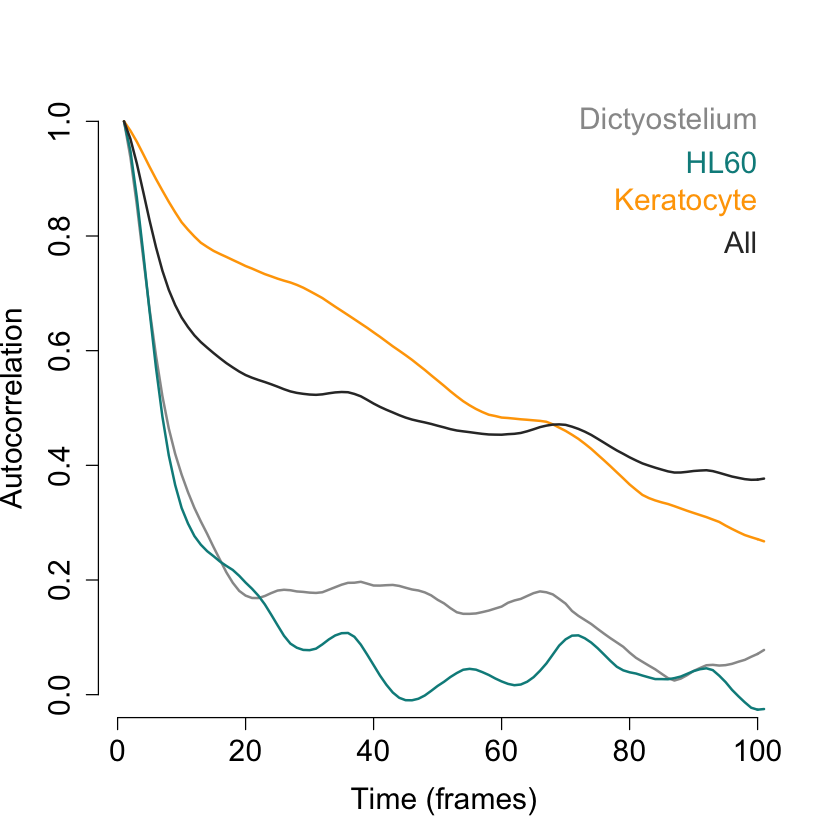

In [15]:
#Set up positions for cell names in plot
z = c(1, 0.93, 0.86, 0.79)

#Set up colors
cols = c('grey60', 'cyan4', 'orange', 'grey20')

#Set up names
n = c('Dictyostelium', 'HL60', 'Keratocyte', 'All')

#Plot
plot(res[[1]], 
     type = 'l', 
     ylim = c(0,1),
     ylab = 'Autocorrelation', 
     bty = 'n',
     col = cols[1], 
     lwd = 2,
     cex.axis = 1.5,
     cex.lab = 1.5,
     xlab = 'Time (frames)')
text(100, 
     z[1], 
     labels = n[1], 
     col = cols[1], 
     cex = 1.5, 
     adj = 1)
for(i in 2:length(res)){
  lines(res[[i]], 
        lwd = 2, 
        col = cols[i])
  text(100, z[i], 
       labels = n[i], 
       col = cols[i], 
       cex = 1.5, 
       adj = 1)}

<font size="3"> Calculate **persistence** in behavior space by cell type.

In [16]:
#Split layout on cell type
s = split(layout, layout$cell)

#Create empty list to save results
res = list()

#Calculate persistence in the unique Louvain clusters for each cell type
for(h in 1:length(s)){
  pos = unique(s[[h]]$louvain_cluster)

  d = c()
  for(i in 1:length(pos)){
    x = which(s[[h]]$louvain_cluster == pos[i])
    idx <- c(0, cumsum(abs(diff(x)) > 1))
    z = split(x, idx)
    x = unlist(lapply(z, function(x) length(x)))
    d = c(d, x)
  }
  res[[names(s)[h]]] = d
}

<font size="3"> Plot **persistence** distributions (as in <b> Figure 4B </b> of Results Pub).

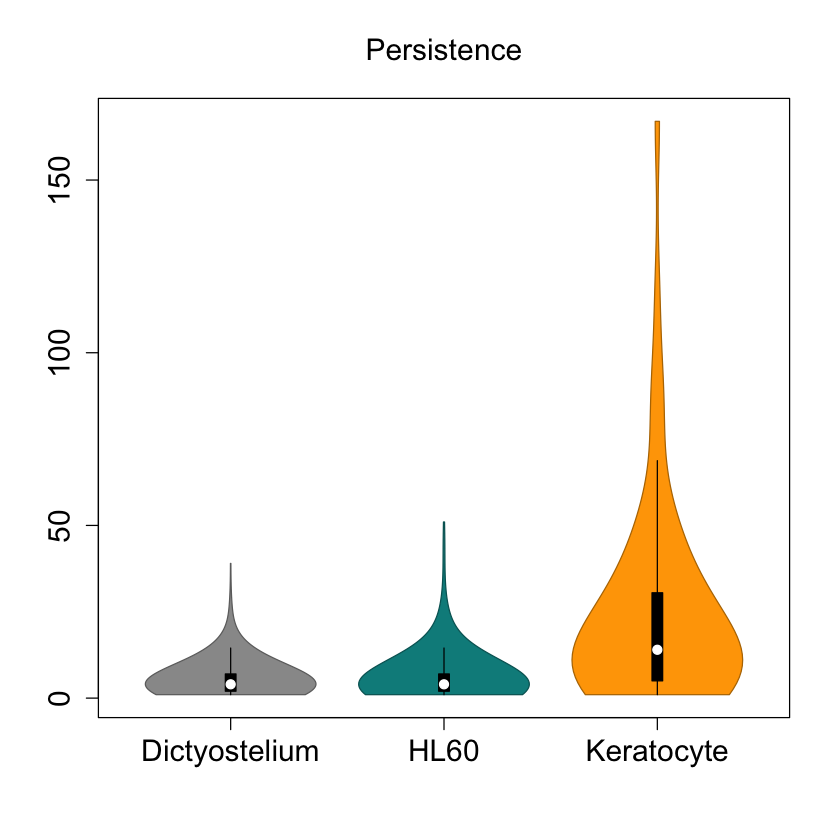

In [17]:
#Set up colors
cols = c('grey60', 'cyan4', 'orange')

#Violin plot
vioplot(res$dicty, 
        res$hl60, 
        res$kera,
        names = c('Dictyostelium', 'HL60', 'Keratocyte'),
        col = cols, 
        border = darken_color(cols),
        cex.lab = 1.5, 
        cex.axis = 1.5, 
        cex.names = 1.5)
title(main = 'Persistence', 
      font.main = 1, 
      cex.main = 1.5)

<font size="3"> Compare **persistence** distributions statistically.

In [18]:
dunn.test(res)

  Kruskal-Wallis rank sum test

data: res and group
Kruskal-Wallis chi-squared = 59.7075, df = 2, p-value = 0


                          Comparison of res by group                           
                                (No adjustment)                                
Col Mean-|
Row Mean |          1          2
---------+----------------------
       2 |  -1.455257
         |     0.0728
         |
       3 |  -7.723428  -7.049763
         |    0.0000*    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


<font size="3"> Plot **persistence** as cumulative distributions (as in <b> Figure 4C </b> of Results Pub).

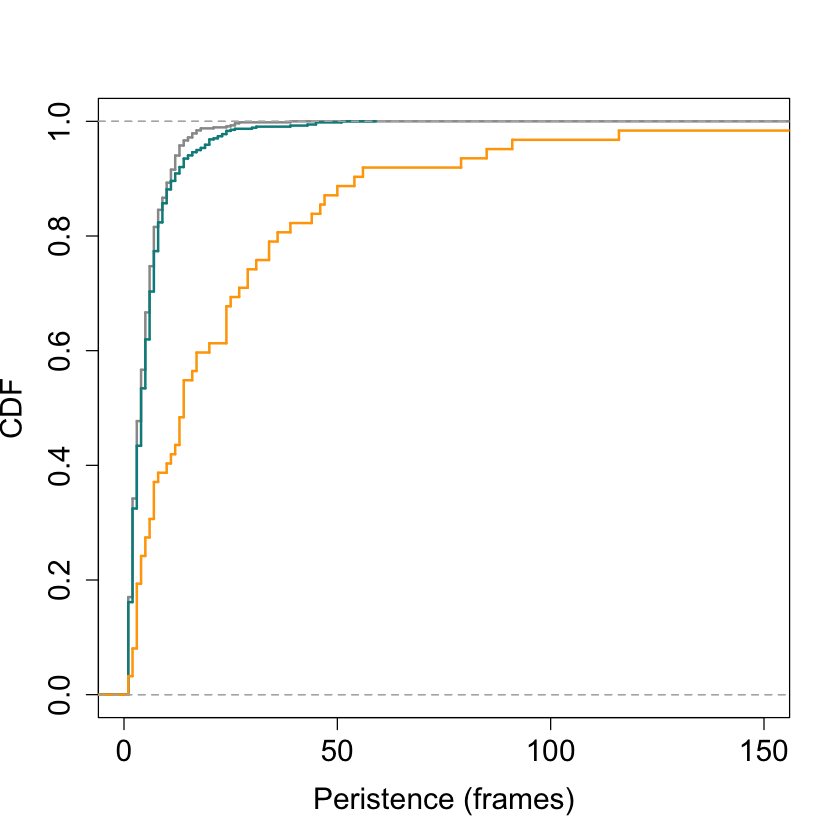

In [19]:
#Calculate cumulative distribution function
p = ecdf(res[[1]])

#Plot
plot(p,
     xlim = c(0, 150),
     ylab = 'CDF',
     xlab = 'Peristence (frames)',
     cex.axis = 1.5,
     cex.lab = 1.5,
     col = cols[1],
     lwd = 2,
     main = '', 
     verticals = TRUE, 
     do.points = FALSE)

p = ecdf(res[[2]])
lines(p,
      col = cols[2], 
      lwd = 2,
      verticals = TRUE, 
      do.points = FALSE)

p = ecdf(res[[3]])
lines(p, 
      col = cols[3], 
      lwd = 2,
      verticals = TRUE, 
      do.points = FALSE)

# Comparing structure-function relationships

><font size="3"> Finally, we can build on the above observations and try to integrate multiple of the axes upon which the different cell types appear to be varying: **shape** and **movement**.
>    
><font size="3"> Specifically, we will interrogate the relationship between **movement space position** (**shape**) and  the geometric measure of **displacement** (**movement**). We are interested in identifying the extent to which **shape** is allowed to freely vary while still outputting similar types of **movement**. This will be inferred by comparing the raw distributions of **shape** and **movement** in addition to the temporal relationships between the two (measured via their **autocorrelations**).

---

<font size="3"> Load geometric measures.

In [20]:
l = readRDS('02_analysis_files/geometric_measures.RDS')

<font size="3"> Add to layout.

In [21]:
x = as.data.frame(do.call(cbind, lapply(l, function(x) x[1:nrow(layout)])))
layout = cbind(layout, x)

<font size="3"> Calculate overall correlations between layout position ('layout$coords') and geometric measures.

In [22]:
lapply(l, function(x) cor(layout$coords[1:length(l$Displacement)], 
                          x[1:length(l$Displacement)], 
                          use = 'complete.obs'))

$Circularity
[1] -0.4668873

$Area
[1] -0.3872772

$Perimeter
[1] -0.5776266

$`Major axis`
[1] -0.5286698

$`Minor axis`
[1] 0.1679069

$Displacement
[1] -0.1887513

<font size="3"> Calculate correlation between layout position and **displacement** by cell type.

In [23]:
#Split layout on cell types
cells = split(layout, layout$cell)

#Compute correlation
lapply(cells, function(x) cor.test(x$coords, 
                                   x$Displacement, 
                                   use = 'complete.obs'))

$dicty

	Pearson's product-moment correlation

data:  x$coords and x$Displacement
t = -1.1006, df = 2834, p-value = 0.2711
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05743382  0.01614846
sample estimates:
        cor 
-0.02067067 


$hl60

	Pearson's product-moment correlation

data:  x$coords and x$Displacement
t = -2.4534, df = 3106, p-value = 0.01421
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.079015920 -0.008833479
sample estimates:
        cor 
-0.04397896 


$kera

	Pearson's product-moment correlation

data:  x$coords and x$Displacement
t = 8.6356, df = 1496, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1691225 0.2656191
sample estimates:
      cor 
0.2179033 



<font size="3"> Generate scatterplots comparing **displacement** and behavior space position by cell type (as in <b> Figures 4D-F </b> of Results Pub).

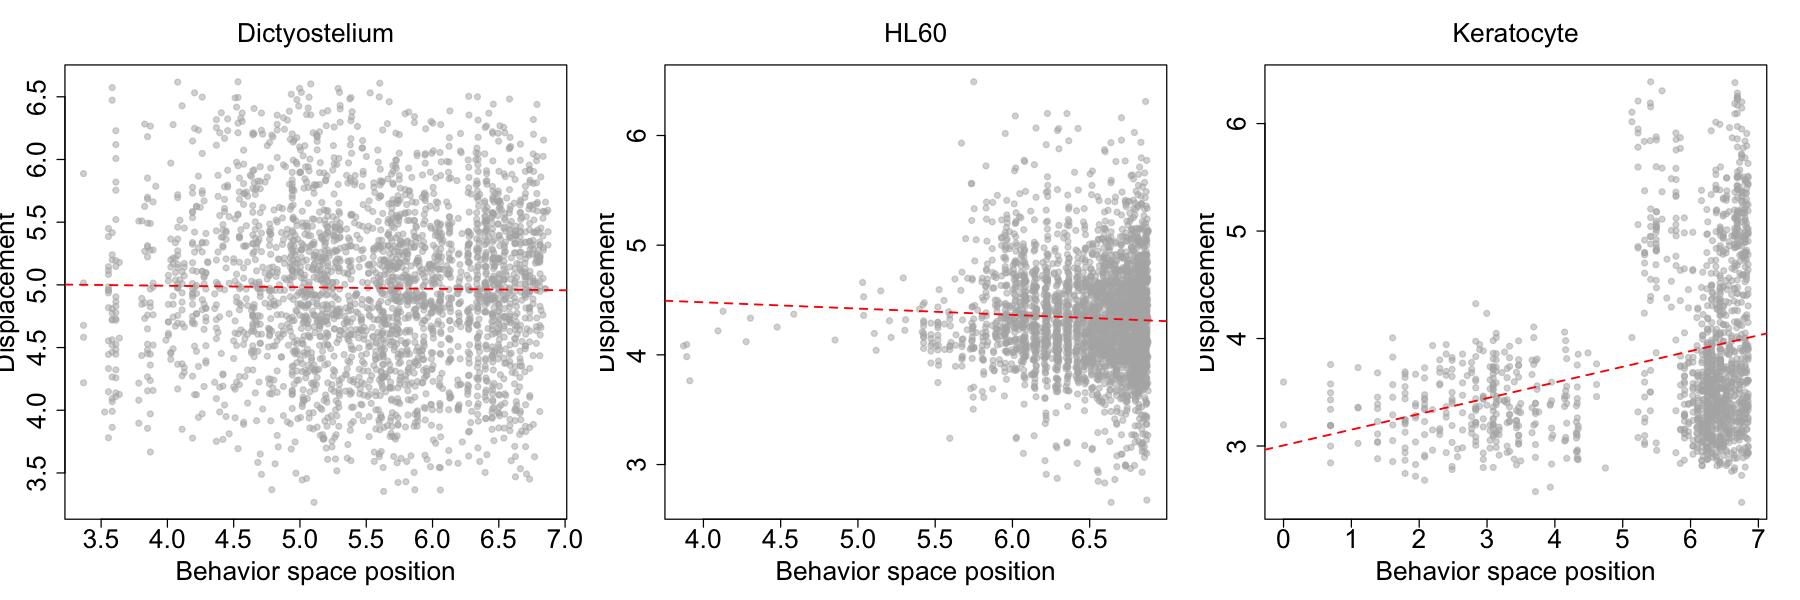

In [24]:
#Set up plot
par(mfrow = c(1,3))
options(repr.plot.width=15, repr.plot.height=5)

#Plot Dictyostelium
plot(log(cells$dicty$coords[!is.na(cells$dicty$Displacement)]),
     log(cells$dicty$Displacement[!is.na(cells$dicty$Displacement)]),
     #nrpoints = 0, bandwidth = c(20,20),
     ylab = 'Displacement', 
     xlab = 'Behavior space position',
     cex.axis = 2,
     cex.lab = 2,
     pch = 20, 
     col = alpha('gray70', 0.5), 
     cex = 1.5)
abline(lm(log(cells$dicty$Displacement[!is.na(cells$dicty$Displacement)])~
            log(cells$dicty$coords[!is.na(cells$dicty$Displacement)])),
       col = 'red', lty = 'dashed', lwd = 1.5)
title(main = 'Dictyostelium', font.main = 1, cex.main = 2)

#Plot HL60
plot(log(cells$hl60$coords[!is.na(cells$hl60$Displacement)]),
     log(cells$hl60$Displacement[!is.na(cells$hl60$Displacement)]),
     #nrpoints = 0, bandwidth = c(20,20),
     ylab = 'Displacement', 
     xlab = 'Behavior space position',
     cex.axis = 2,
     cex.lab = 2,
     pch = 20, 
     col = alpha('gray70', 0.5), 
     cex = 1.5)
abline(lm(log(cells$hl60$Displacement[!is.na(cells$hl60$Displacement)])~
            log(cells$hl60$coords[!is.na(cells$hl60$Displacement)])),
       col = 'red', lty = 'dashed', lwd = 1.5)
title(main = 'HL60', font.main = 1, cex.main = 2)

#Plot keratocytes
plot(log(cells$kera$coords[!is.na(cells$kera$Displacement)]),
     log(cells$kera$Displacement[!is.na(cells$kera$Displacement)]),
     #nrpoints = 0, bandwidth = c(20,20),
     ylab = 'Displacement', 
     xlab = 'Behavior space position',
     cex.axis = 2,
     cex.lab = 2,
     pch = 20, 
     col = alpha('gray70', 0.5), 
     cex = 1.5)
abline(lm(log(cells$kera$Displacement[!is.na(cells$kera$Displacement)])~
            log(cells$kera$coords[!is.na(cells$kera$Displacement)])),
       col = 'red', lty = 'dashed', lwd = 1.5)
title(main = 'Keratocyte', font.main = 1, cex.main = 2)

<font size="3"> Compare the autocorrelations of behavior space position and **displacement** (as in <b> Figures 4G-I </b> of Results Pub).


Call:
lm(formula = b ~ a)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44747 -0.04026 -0.00220  0.02907  0.52309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.020218   0.005317   3.803 0.000173 ***
a           1.427248   0.060902  23.435  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08313 on 299 degrees of freedom
Multiple R-squared:  0.6475,	Adjusted R-squared:  0.6463 
F-statistic: 549.2 on 1 and 299 DF,  p-value: < 2.2e-16


Call:
lm(formula = b ~ a)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37521 -0.04020  0.00174  0.03376  0.42760 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.058840   0.005406  -10.88   <2e-16 ***
a            1.434047   0.054302   26.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07726 on 299 degrees of freedom
Multiple R-squared

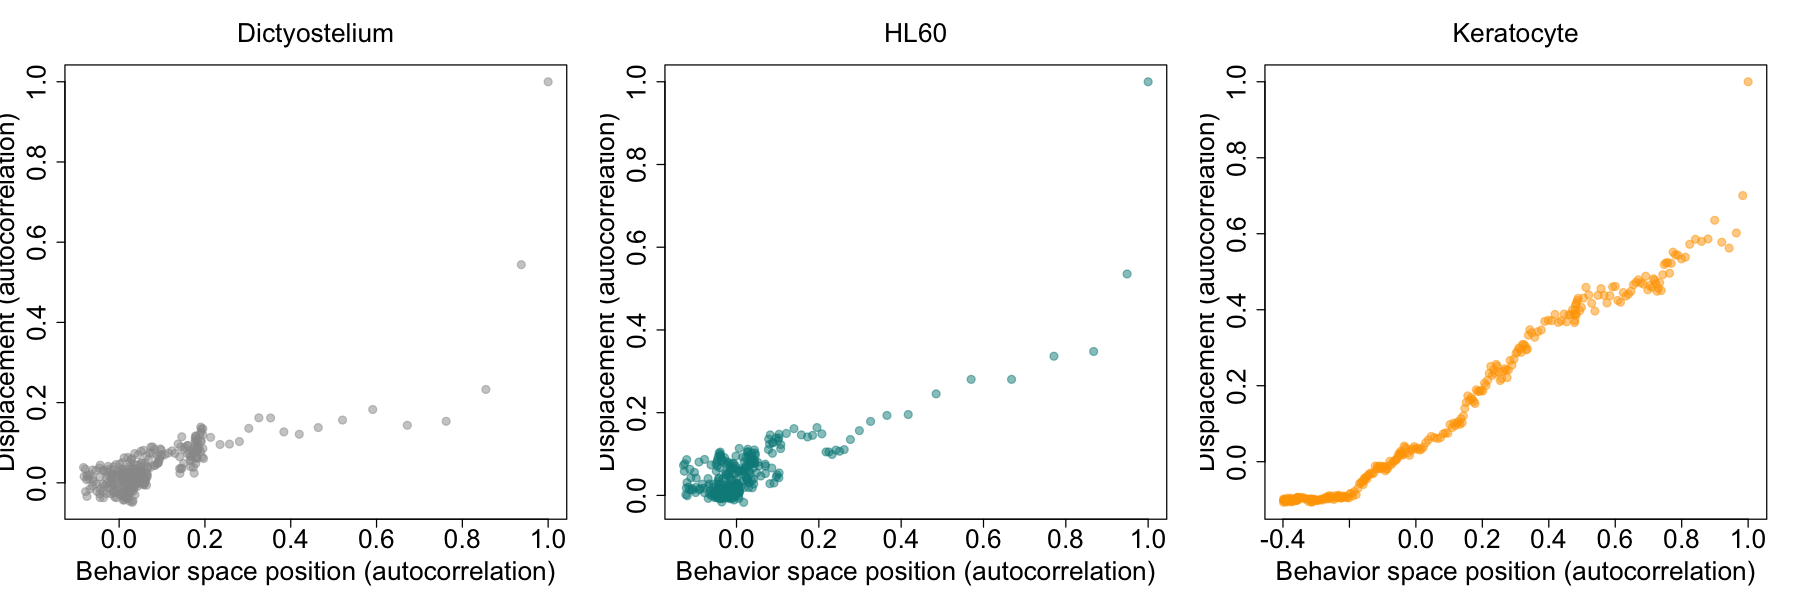

In [25]:
#Split on cell type
cells = split(layout, layout$cell)

#Set up plot
par(mfrow = c(1,3))
options(repr.plot.width=15, repr.plot.height=5)

#Set up names
n = c('Dictyostelium', 'HL60', 'Keratocyte')


#Plot
for(i in 1:length(cells)){
    
  #Calculate autocorrelations
  a = acf(cells[[i]]$Displacement[!is.na(cells[[i]]$Displacement)], lag = 300, plot = FALSE)$acf[,,1]
  b = acf(cells[[i]]$coords, lag = 300, plot = FALSE)$acf[,,1]
  
  #Plot
  plot(b, 
       a, 
       pch = 20, 
       col = alpha(cols[i], 0.5), 
       cex = 2, 
       cex.axis = 2, 
       cex.lab = 2,
       xlab = 'Behavior space position (autocorrelation)',
       ylab = 'Displacement (autocorrelation)')
  title(main = n[i], font.main = 1, cex.main = 2)
  print(summary(lm(b~a)))
}